** JUEGO DEL AHORCADO **

Objetivo del proyecto: Desarrollo de una versión del juego del ahorcado.

Reglas y premisas del juego:
1. Mecánica del juego:
    - Palabra oculta: La jugadora debe adivinar una palabra secreta relacionada con la Navidad, que se representará inicialmente por guiones bajos: _ _ _ _
    - Turnos:
        - En cada turno, la jugadora introduce una única letra.
            - En caso de acierto: se revela la letra jugada en la posición correspondiente
            - En caso de fallo: Se restará una vida o intento a la jugadora y la figura del ahorcado irá progresando.
    - Victoria: La jugadora descubre la palabra completa antes de agotar los intentos.
    - Derrota: La jugadora pierde si se completa la figura del ahorcado (se agotan los intentos) antes de descubrir la palabra.

2. Especificaciones y restricciones:
    - Se fija un máximo de intentos permitidos en 7.
    - Todas las interacciones (tanto la palabra oculta como la letra introducida) se trabajarán en mayúscula.
    - Se descarta el uso de tildes y Ñ.
    - Cualquier introducción de una letra no válida será avisada con un mensaje de error sin restar intento al turno.
    - Será visible el registro de las letras jugadas para evitar repeticiones y penalizaciones innecesarias.

In [2]:
#Definimos a continuación las principales variables que entran en juego:
    #Set del abecedario en mayúsculas (A-Z), excluyendo tildes y la Ñ, utilizado para validar las entradas de la jugadora.
    #Listado de palabras navideñas (cadenas de texto en mayúsculas) con las que el juego seleccionará la palabra secreta.
    #Máximo de intentos: Define el límite de fallos permitidos.
    #Variable de intentos restantes: Lleva la cuenta regresiva de los intentos que le quedan a la jugadora. Inicia en 7.
    #Variable de fallos: Contador del número de fallos. Inicia en 0.
    #Lista para almacenar las letras jugadas: Lista vacía que irá añadiendo las entradas válidas de la jugadora, sean acertadas o no.
    #Lista con los diferentes estados del ahorcado a lo largo del juego.
    #Condiciones de selección del estado del ahorcado

abecedario = {
    "A", "B", "C", "D", "E", "F", "G",
    "H", "I", "J", "K", "L", "M", "N",
    "O", "P", "Q", "R", "S", "T", "U",
    "V", "W", "X", "Y", "Z"
}

palabras_navidad = [
    "ABRAZO", "ABRIGO", "ACOGIDA", "ADORNO", "AGRADECIMIENTO",
    "AMISTAD", "AMOR", "ARBOL", "ARLEQUIN", "AROMA",
    "BELEN", "BIENVENIDA", "BOTA", "BRASERO", "BRILLANTE",
    "BRILLANTINA", "BRILLO", "CALCETIN", "CALIDEZ", "CAMELLO",
    "CAMPANA", "CAMPANADAS", "CAMPANILLA", "CAMPAMENTO", "CAMINATA", "CABALGATA",
    "CARTA", "CARAMELOS", "CARBON", "CELEBRACION", "CESTA",
    "CHIMENEA", "CENA", "COLORES", "COMPROMISO", "CONVIVENCIA",
    "CORDIAL", "CORONA", "DESEO", "DECORACION", "DECORATIVO",
    "DESLUMBRANTE", "DUENDE", "ELFO", "EMBALAJE", "ESCARCHA", "ESPIRITU", "ESPUMILLON",
    "ESTABLO", "ESTACION", "ESTRELLA", "EVENTO",
    "FAMILIA", "FANTASIA", "FELICIDAD", "FESTEJO", "FESTIVIDAD",
    "FIESTA", "GALLETAS", "GENEROSIDAD", "GUIRNALDA", "HELADA",
    "HILANDERA", "HOGAR", "HOSPITALIDAD", "ILUMINACION", "ILUSION",
    "IMAGINACION", "INFINITO", "INOCENCIA", "INSPIRADOR", "INSPIRACION",
    "INVIERNO", "LINTERNA", "LUZ", "LUCES", "MAGIA",
    "MANTEL", "MAZAPAN", "MUERDAGO", "NAVIDAD", "NEVADA", "NIEVE",
    "NOCHEBUENA", "OASIS", "PANDERETA", "PAZ", "POLVORON", "POSADA",
    "POSTAL", "PUREZA", "REGALOS", "RECUERDO", "REYES",
    "RENACER", "RENOS", "RESOLUCION", "RESPLANDOR", "REUNION",
    "SANTA", "SOLIDARIDAD", "SORPRESA", "TURRON", "TRADICION",
    "TRINEO", "TRINEOS", "VELA", "VENTISCA", "VILLANCICO",
    "ZAMBOMBA", "ZAPATO"
]

max_intentos = 7
letras_jugadas = []
intentos_restantes = max_intentos
fallos = 0

estados_ahorcado = [
    # Índice 0: 0 Fallos (7 intentos restantes)
    """
       ------
            |
            |
            |
            |
            |
    ---/-----\\---
    """,
    # Índice 1: 1 Fallo (6 intentos restantes) = Soga
    """
       ------
       |    |
            |
            |
            |
            |
    ---/-----\\---
    """,
    # Índice 2: 2 Fallos (5 intentos restantes) = Cabeza
    """
       ------
       |    |
       O    |
            |
            |
            |
    ---/-----\\---
    """,
    # Índice 3: 3 Fallos (4 intentos restantes) = Cuerpo
    """
       ------
       |    |
       O    |
       |    |
            |
            |
    ---/-----\\---
    """,
    # Índice 4: 4 Fallos (3 intentos restantes) = Brazo 1
    """
       ------
       |    |
       O    |
      /|    |
            |
            |
    ---/-----\\---
    """,
    # Índice 5: 5 Fallos (2 intentos restantes) = Brazo 2
    """
       ------
       |    |
       O    |
      /|\\   |
            |
            |
    ---/-----\\---
    """,
    # Índice 6: 6 Fallos (1 intento restante) = Pierna 1
    """
       ------
       |    |
       O    |
      /|\\   |
      /     |
            |
    ---/-----\\---
    """,
    # Índice 7: 7 Fallos (0 intentos restantes) = Derrota
    """
       ------
       |    |
       O    |
      /|\\   |
      / \\   |
            |
    ---/-----\\---
    """
]

#Condiciones para mostrar el avance del ahorcado
if intentos_restantes == 7 and fallos == 0:
    print(estados_ahorcado[0])
elif intentos_restantes == 6 and fallos == 1:
    print(estados_ahorcado[1])
elif intentos_restantes == 5 and fallos == 2:
    print(estados_ahorcado[2])
elif intentos_restantes == 4 and fallos == 3:
    print(estados_ahorcado[3])
elif intentos_restantes == 3 and fallos == 4:
    print(estados_ahorcado[4])
elif intentos_restantes == 2 and fallos == 5:
    print(estados_ahorcado[5])
elif intentos_restantes == 1 and fallos == 6:
    print(estados_ahorcado[6])
elif intentos_restantes == 0 and fallos == 7:
    print(estados_ahorcado[7])


       ------
            |
            |
            |
            |
            |
    ---/-----\---
    


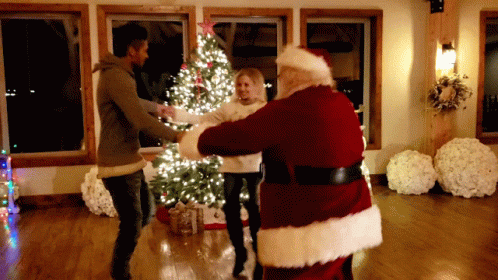

In [3]:
#Definimos GIF de victoria:
from IPython.display import Image
Image ('gif_celebracion2.gif')

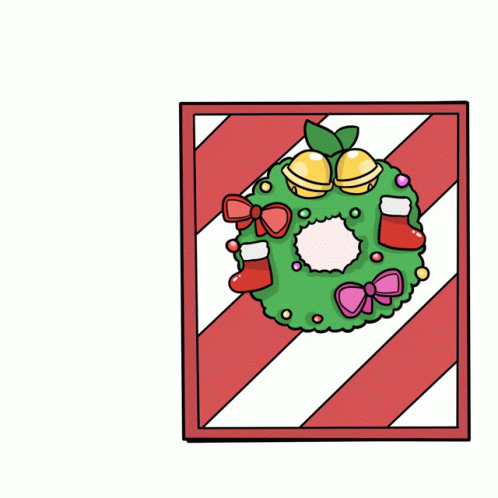

In [4]:
#Definimos GIF de derrota:
from IPython.display import Image
Image ('gif_derrota.gif')

✨ ¡Bienvenidos al Ahorcado Navideño! ✨
🎅 Objetivo: Desvela la palabra secreta de Navidad antes de que la cuerda te atrape.
🎁 Pista: Juega una letra cada vez. ¡La suerte acompaña a los valientes! 🍀


----------------------------------------------------------------------------------------------------
Te quedan 7 intentos⌛

       ------
            |
            |
            |
            |
            |
    ---/-----\---
    

 🔮 Adivina la palabra 🔮
_ _ _ _


Letras que has jugado: 
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------





----------------------------------------------------------------------------------------------------
🎉 ¡BINGO! ¡Acertaste con la **A**! ¡La Navidad está de tu lado! 🎁
----------------------------------------------------------------------------------------------------
Te quedan 7 intentos⌛

       ------

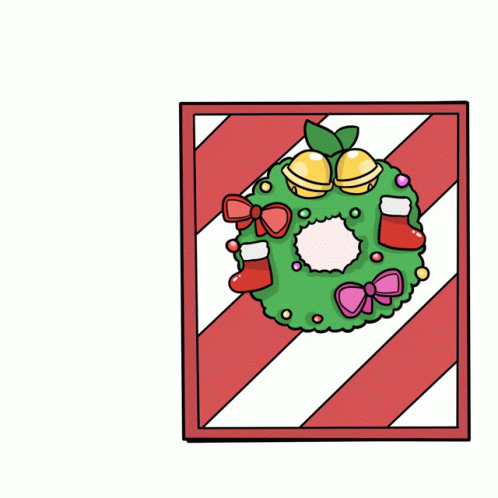

In [5]:
#Core Logic:
print("✨ ¡Bienvenidos al Ahorcado Navideño! ✨")
print("🎅 Objetivo: Desvela la palabra secreta de Navidad antes de que la cuerda te atrape.")
print("🎁 Pista: Juega una letra cada vez. ¡La suerte acompaña a los valientes! 🍀\n")

import random
palabra_secreta = random.choice(palabras_navidad)
tablero = ['_'] * len(palabra_secreta)

print('\n' + '-' * 100)
print(f'Te quedan {intentos_restantes} intentos⌛')
print(estados_ahorcado[0])
print("\n 🔮 Adivina la palabra 🔮")
print(" ".join(tablero))
print("\n")
print(f'Letras que has jugado: {", ".join(letras_jugadas)}')
print('-' * 100)
print('-' * 100)
print("\n")
print("\n")

while '_' in tablero and intentos_restantes > 0:
    letra = input("🌟 ¡Vamos! ¿Con qué letra mágica te atreves a jugar? 🥳 👉 ").upper().strip()
    if len(letra) != 1:  #que escriba más de una letra, o una letra y un simbolo...
        print('❌ ¡Ups! Solo necesitamos **UNA** letra. Concéntrate. 😉')
    elif not letra.isalpha():  #que escriba un número o un símbolo
        print('🔢 ¡Eh! Solo se permiten **LETRAS**. Nada de números ni símbolos. Vuelve a intentarlo.')
    elif letra not in abecedario:
        print('🚫 Error: Letra no válida. ¡Recuerda, solo A-Z sin tildes! ❌')
    elif letra in letras_jugadas:  #que escriba una letra repetida que ya ha usado
        print(f'🔁 Ya usaste la letra **{letra}**. ¡Piensa en una nueva, no pierdas el turno! 🧐')
    else:   #seria la entrada válida, por lo que se añadirá a la lista
        letras_jugadas.append(letra)
        if letra in palabra_secreta: #si la letra con la que juega está en la palabra que se juega, quiero que me reemplace la barra baja por la letra 
            for i in range(len(palabra_secreta)):
                if palabra_secreta[i] == letra:
                    tablero[i] = letra
            print('\n' + '-' * 100)
            print(f'🎉 ¡BINGO! ¡Acertaste con la **{letra}**! ¡La Navidad está de tu lado! 🎁')
            print('-' * 100)
            print(f'Te quedan {intentos_restantes} intentos⌛')
            print(estados_ahorcado[fallos])
            print("\n 🔮 Adivina la palabra 🔮")
            print(" ".join(tablero))
            print("\n")
            print(f'Letras que has jugado: {", ".join(letras_jugadas)}')
            print('-' * 100)
            print('-' * 100)
            print("\n")
            print("\n")
        else:
            intentos_restantes -= 1
            fallos += 1
            print('\n' + '-' * 100)
            print(f'❌ ¡Letra fallida! La **{letra}** es tan fría como el Polo Norte. 📉 ¡Un intento menos! 🥶')
            print('\n' + '-' * 100)
            print(f'Te quedan {intentos_restantes} intentos⌛')
            print(estados_ahorcado[fallos])
            print("\n 🔮 Adivina la palabra 🔮")
            print(" ".join(tablero))
            print("\n")
            print(f'Letras que has jugado: {", ".join(letras_jugadas)}')
            print('-' * 100)
            print('-' * 100)
            print("\n")
            print("\n")
if '_' not in tablero:
    print("✨🌟🎄🎅 ¡FELICIDADES! ¡HAS SALVADO LA NAVIDAD! 🎅🎄🌟✨")
    print(f'La palabra secreta era: **{palabra_secreta}**. ¡Eres un genio! 🧠')
    from IPython.display import Image
    display(Image ('gif_celebracion2.gif'))
else:
    print("💀 ¡JUEGO TERMINADO! 😭")
    print("¡Oh, no! El Grinch de la Navidad te ha atrapado . Más suerte la próxima vez.🔚")
    print(f'La palabra secreta que no pudiste adivinar era: **{palabra_secreta}** 🙈.')
    from IPython.display import Image
    display(Image ('gif_derrota.gif'))